In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
HouseDF = pd.read_csv('HousePricePreciction.csv')

In [3]:
#To get top 5 rows from the dataset
HouseDF.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [6]:
#Using shape property to get the number of rows and columns in the dataset
HouseDF.shape

(2919, 13)

In [26]:
#Finding No. of Categorical variables and its column names

objects = (HouseDF.dtypes=='object')

object_cols = list(objects[objects].index)

print("number of Categorical variables =",len(object_cols),"\n","Categorical Variables are:", object_cols)

number of Categorical variables = 4 
 Categorical Variables are: ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']


In [54]:
#Finding No. of integer variables and its column names

Integ_ = (HouseDF.dtypes=='integer')
Integ_cols = list(Integ_[Integ_].index)
print("number of Integer Variables = ",len(Integ_cols),"\n","Integer Variables are",Integ_cols)

number of Integer Variables =  0 
 Integer Variables are []


In [22]:
#Extracting No. of float variables and its column names

Flt = (HouseDF.dtypes=='float')
Flt_cols = list(Flt[Flt].index)
print("Number of Float Variables = ",len(Flt_cols), "\n","Float Variables are",Flt_cols)

Number of Float Variables =  3 
 Float Variables are ['BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']


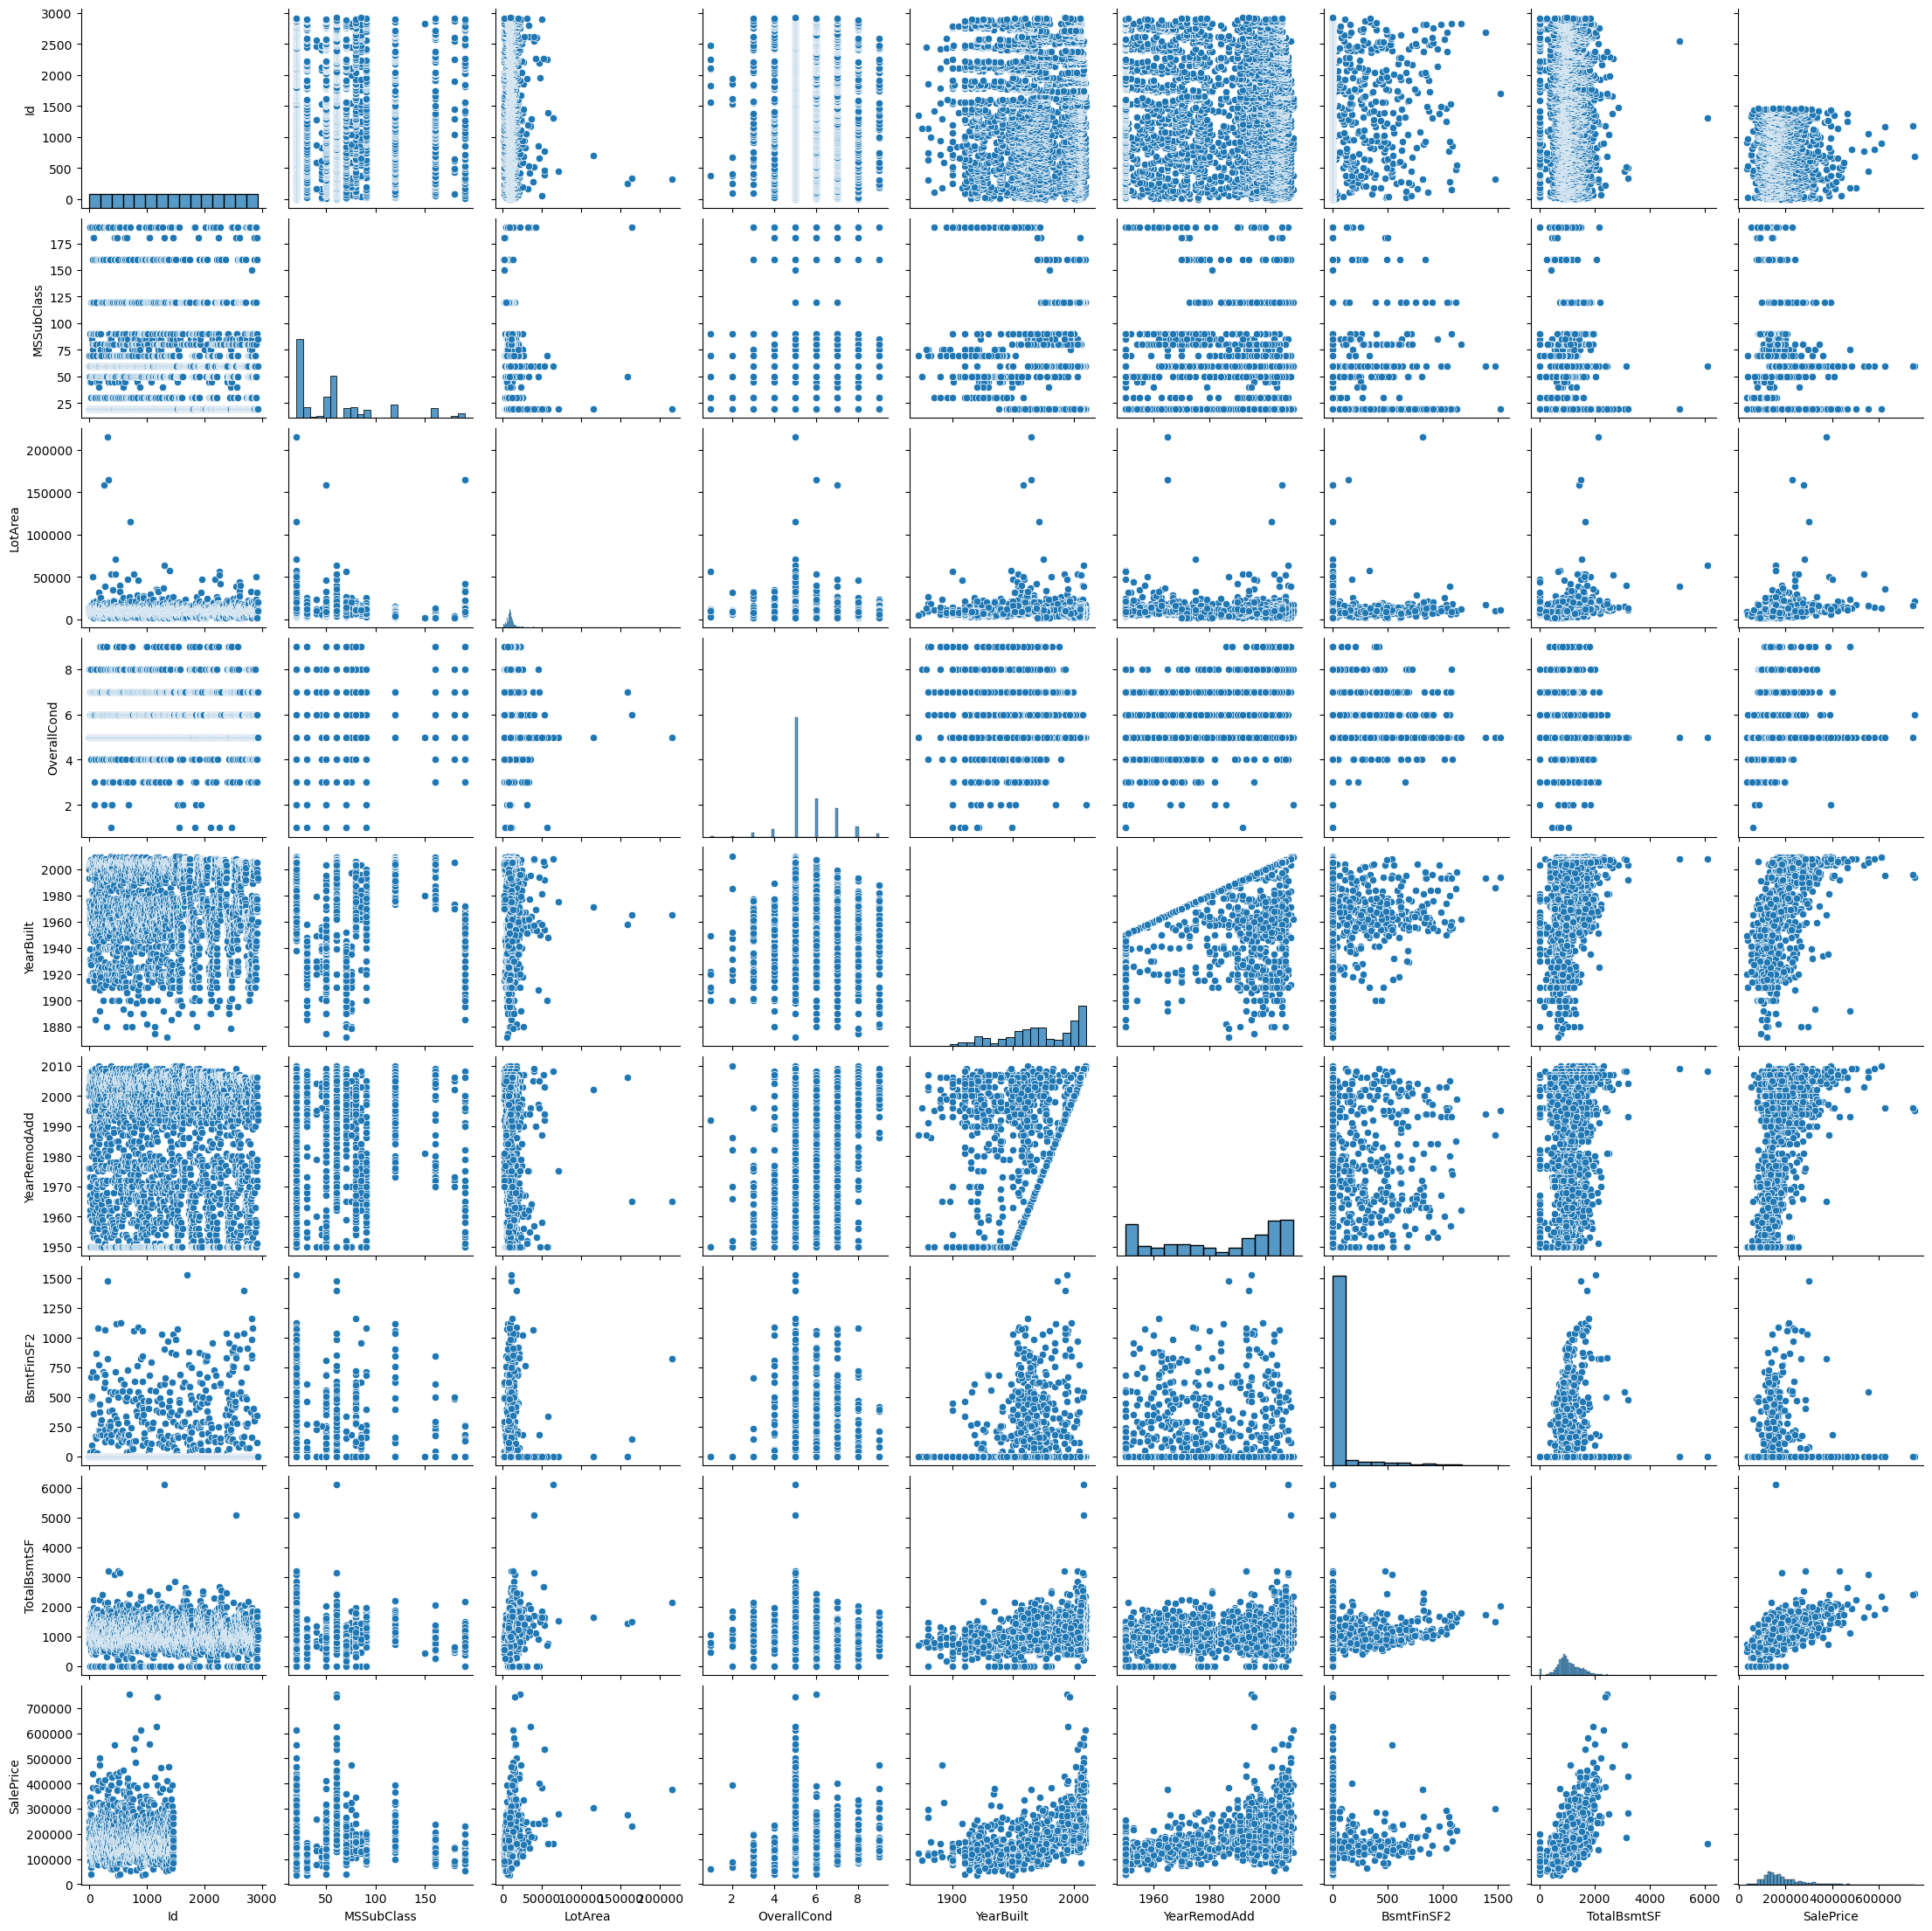

In [9]:
#Visualizing correlation each feature pair in dataset
sns.pairplot(HouseDF)

C:\Users\yuges\AppData\Local\Temp\ipykernel_18680\795629368.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(HouseDF.corr(),


<Axes: >

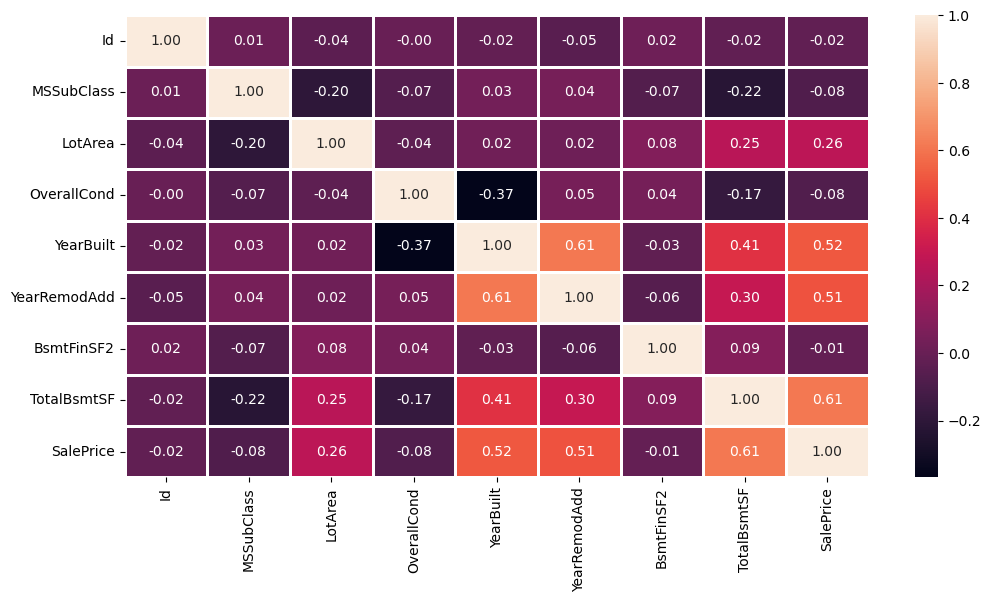

In [24]:
#2-D graphical representation of data

plt.figure(figsize=(12,6))
sns.heatmap(HouseDF.corr(),
            fmt='.2f',
            linewidths=2,
            annot=True)

<Axes: title={'center': 'No. of unique values of categorical features'}>

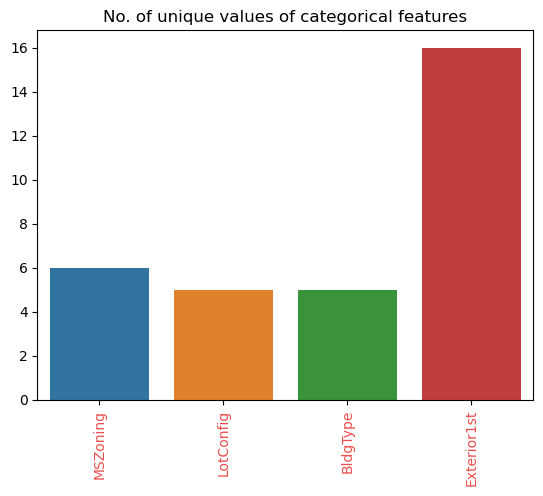

In [38]:
#ploting bar chart with unique values on categorical variable  

unique_values = []
for cols in object_cols:
    unique_values.append(HouseDF[cols].unique().size)
plt.title('No. of unique values of categorical features')
plt.xticks(rotation=90,color='#eb4d4b')
sns.barplot(x=object_cols,y=unique_values)    

C:\Users\yuges\AppData\Local\Temp\ipykernel_18680\173293690.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11,4,index)


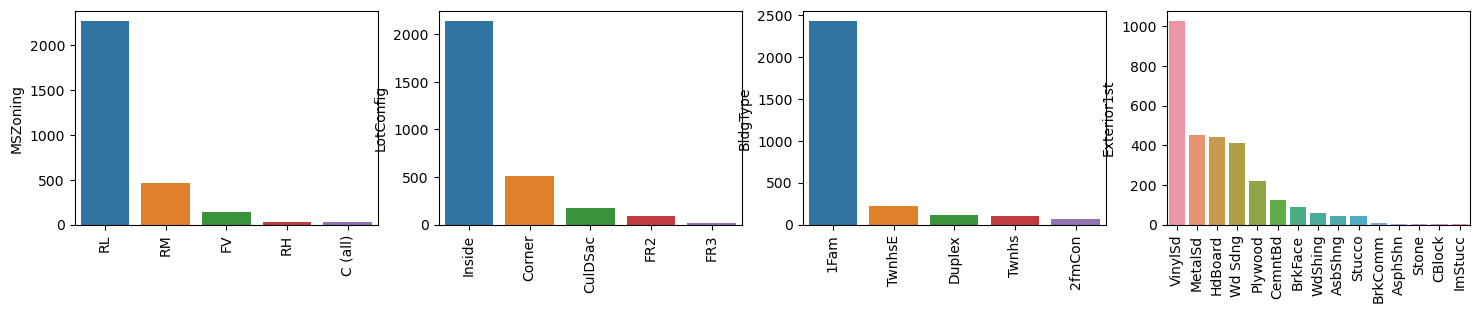

In [42]:
#Categorical features distribution


plt.figure(figsize=(18,36))
plt.title('categorical faeture disrtibution')
index = 1

for cols in object_cols:
   y = HouseDF[cols].value_counts()
   plt.subplot(11,4,index)
   plt.xticks(rotation=90)
   sns.barplot(x=list(y.index),y=y)
   index += 1 
    

In [43]:
#DATA CLEANING PROCESS

In [45]:
#removing ID column from the dataset
HouseDF.drop(['Id'],axis=1,inplace=True)

In [47]:
#replacing SalePrice values eith its ,mean values to make the distribution symmetric

HouseDF['SalePrice'] = HouseDF['SalePrice'].fillna(HouseDF['SalePrice'].mean())

In [49]:
#Drop records with null values

new_HouseDF = HouseDF.dropna()

In [51]:
#To check wheather the empty values are still present in the dataset

new_HouseDF.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [68]:
#Using OneHotEncoder to label categorical faetures

from sklearn.preprocessing import OneHotEncoder, StandardScaler

c = (new_HouseDF.dtypes=='object')
object_cols = list(c[c].index)
print("Categorical variables :",object_cols,"\n","No. of categorical features :",len(object_cols))

Categorical variables : ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'] 
 No. of categorical features : 4


In [69]:
#Applying onehotencoder to the categorical features

OH_enc = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_enc.fit_transform(new_HouseDF[object_cols]))
OH_cols.index = new_HouseDF.index
OH_cols.columns = OH_enc.get_feature_names_out()
DF_final = new_HouseDF.drop(object_cols,axis=1)
DF_final = pd.concat([DF_final,OH_cols],axis=1)

C:\Users\yuges\anaconda3\fds\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [71]:
# Splitting datset into train data and test data

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = DF_final.drop(['SalePrice'], axis=1)
Y = DF_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y,train_size = 0.8, test_size = 0.2, random_state= 0)

In [75]:
# Model and Accuracy

#1.SVM (SUPPORT VECTOR MACHINE)

from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)

Y_predict = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid,Y_predict))


0.1870512931870423


In [79]:
#2.Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

model_RFR =RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train,Y_train)

Y_predict = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_predict)

0.19396260050571656

In [104]:
#3. Linear Regression

from sklearn.linear_model import LinearRegression


model_LR= LinearRegression()
model_LR.fit(X_train,Y_train)

Y_predict = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_predict))

0.18741683841600051


In [106]:
#4.CatBoost Classifier

from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_MDL = CatBoostRegressor()
cb_MDL.fit(X_train, Y_train)
pred = cb_MDL.predict(X_valid)

cb_r2_score = r2_score(Y_valid,pred )
cb_r2_score

Learning rate set to 0.046797
0:	learn: 56473.5753002	total: 3.09ms	remaining: 3.09s
1:	learn: 55780.1567575	total: 5.23ms	remaining: 2.61s
2:	learn: 55060.9599505	total: 7.35ms	remaining: 2.44s
3:	learn: 54456.1126921	total: 10.4ms	remaining: 2.59s
4:	learn: 53901.1464265	total: 12.5ms	remaining: 2.48s
5:	learn: 53334.6062357	total: 14.8ms	remaining: 2.46s
6:	learn: 52824.4943646	total: 17.1ms	remaining: 2.43s
7:	learn: 52381.4267520	total: 19.1ms	remaining: 2.36s
8:	learn: 51841.0364316	total: 21.6ms	remaining: 2.38s
9:	learn: 51281.5852560	total: 23.9ms	remaining: 2.36s
10:	learn: 50825.3817438	total: 26.1ms	remaining: 2.35s
11:	learn: 50477.2609796	total: 28.4ms	remaining: 2.34s
12:	learn: 50081.4097641	total: 30.5ms	remaining: 2.32s
13:	learn: 49663.6380360	total: 32.6ms	remaining: 2.29s
14:	learn: 49334.5782662	total: 35.1ms	remaining: 2.31s
15:	learn: 48967.5221026	total: 37.2ms	remaining: 2.29s
16:	learn: 48676.4063222	total: 39.4ms	remaining: 2.28s
17:	learn: 48359.1169955	tot

0.38351169878113034